# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# read data

In [2]:
df=pd.read_csv('Comp loan.csv')

# Exploring the Dataset.

In [3]:
df.head()

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485.0,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299.0,Paid in full


In [4]:
df.shape

(1810, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   id                                        1810 non-null   int64  
 2   owner_1_score                             1786 non-null   float64
 3   RATE_owner_1                              1780 non-null   object 
 4   CAP_AMOUNT_owner_1                        1775 non-null   float64
 5   PERCENT_OWN_owner_1                       1793 non-null   float64
 6   owner_2_score                             214 non-null    float64
 7   RATE_owner_2                              214 non-null    object 
 8   CAP_AMOUNT_owner_2                        202 non-null    float64
 9   PERCENT_OWN_owner_2                       259 non-null    float64
 10  owner_3_score                       

In [6]:
df.describe()

,Unnamed: 0,id,owner_1_score,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,CAP_AMOUNT_owner_3,...,INPUT_VALUE_ID_FOR_tax_lien_percent,INPUT_VALUE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
count,1810.000000,1810.000000,1786.000000,1775.000000,1793.000000,214.000000,202.000000,259.000000,10.000000,10.000000,...,1810.000000,1799.000000,1796.000000,1.803000e+03,0.0,0.0,1777.000000,1714.000000,1755.00000,1810.000000
mean,1001.137017,4504.114365,641.054871,116921.126761,92.623424,1087.990654,114529.702970,35.180695,677.900000,105000.000000,...,0.041799,0.015564,0.714922,8.912347e+04,NaN,NaN,655.070906,116245.624271,97.13453,3961.659116
std,579.155508,2548.843589,449.126835,47185.432359,37.182069,1934.812936,55576.146579,18.644552,203.136763,72456.883731,...,1.279912,0.178929,0.781414,1.668000e+05,NaN,NaN,572.824248,47780.361911,35.10213,2156.725892
min,0.000000,33.000000,0.000000,0.000000,0.000000,432.000000,0.000000,0.000000,376.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.00000,88.000000
25%,499.250000,2629.250000,573.000000,100000.000000,100.000000,560.000000,100000.000000,20.000000,500.250000,37500.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,568.000000,100000.000000,100.00000,2311.000000
50%,1001.500000,4477.500000,620.000000,150000.000000,100.000000,647.000000,150000.000000,49.000000,804.000000,150000.000000,...,0.000000,0.000000,1.000000,4.725129e+04,NaN,NaN,621.000000,150000.000000,100.00000,4196.500000
75%,1499.750000,6320.000000,663.000000,150000.000000,100.000000,679.000000,150000.000000,50.000000,804.000000,150000.000000,...,0.000000,0.000000,1.000000,1.036317e+05,NaN,NaN,664.000000,150000.000000,100.00000,5368.000000
max,2011.000000,11271.000000,9002.000000,150000.000000,1000.000000,9002.000000,150000.000000,64.000000,804.000000,150000.000000,...,53.968000,3.000000,4.000000,2.291481e+06,NaN,NaN,9002.000000,150000.000000,1000.00000,9062.000000


In [7]:
df.drop( ['id','Unnamed: 0'] , axis=1 , inplace=True)

# Checking missing values and handle it

In [8]:
df.isnull().sum().sort_values(ascending=False)

INPUT_VALUE_ID_FOR_judgement_lien_time      1810
RATE_ID_FOR_judgement_lien_time             1810
RATE_ID_FOR_avg_net_deposits                1810
RATE_ID_FOR_industry_type                   1810
RATE_ID_FOR_funded_last_30                  1804
RATE_owner_3                                1800
owner_3_score                               1800
CAP_AMOUNT_owner_3                          1800
RATE_ID_FOR_fsr                             1791
PERCENT_OWN_owner_3                         1768
CAP_AMOUNT_owner_2                          1608
owner_2_score                               1596
RATE_owner_2                                1596
PERCENT_OWN_owner_2                         1551
fsr                                          495
CAP_AMOUNT_owner_4                            96
RATE_owner_4                                  79
RATE_ID_FOR_location                          74
PERCENT_OWN_owner_4                           55
CAP_AMOUNT_owner_1                            35
INPUT_VALUE_owner_4 

In [9]:
for col in df.columns:
  if df[col].isnull().sum() > 1500:
    df.drop(col,axis=True,inplace=True)

In [10]:
df.shape

(1810, 40)

In [11]:
df.isnull().sum().sort_values(ascending=False)

fsr                                         495
CAP_AMOUNT_owner_4                           96
RATE_owner_4                                 79
RATE_ID_FOR_location                         74
PERCENT_OWN_owner_4                          55
CAP_AMOUNT_owner_1                           35
INPUT_VALUE_owner_4                          33
RATE_owner_1                                 30
INPUT_VALUE_ID_FOR_industry_type             30
owner_1_score                                24
PERCENT_OWN_owner_1                          17
years_in_business                            16
RATE_ID_FOR_years_in_business                16
INPUT_VALUE_ID_FOR_current_position          14
RATE_ID_FOR_current_position                 14
location                                     11
INPUT_VALUE_ID_FOR_tax_lien_count            11
RATE_ID_FOR_tax_lien_count                   11
INPUT_VALUE_ID_FOR_avg_net_deposits           7
RATE_ID_FOR_num_negative_days                 2
RATE_ID_FOR_judgement_lien_percent      

In [12]:
for col in df.columns:
  if df[col].isnull().sum():
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0],inplace=True)
    else:
      df[col].fillna(int(df[col].mean()),inplace=True)

C:\Users\bisho\AppData\Local\Temp\ipykernel_24520\675308058.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(int(df[col].mean()),inplace=True)
C:\Users\bisho\AppData\Local\Temp\ipykernel_24520\675308058.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# check after handling

In [13]:
df.isnull().sum().sort_values(ascending=False)

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger        

## Convert Object To Numerical & Check Outliers

In [14]:
label=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=label.fit_transform(df[col])

In [15]:
for col in df.columns:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)

  iqr = q3 - q1
  
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"{col}: {outliers_iqr.shape[0]} outliers")

owner_1_score: 21 outliers
RATE_owner_1: 77 outliers
CAP_AMOUNT_owner_1: 72 outliers
PERCENT_OWN_owner_1: 304 outliers
years_in_business: 159 outliers
RATE_ID_FOR_years_in_business: 243 outliers
fsr: 0 outliers
location: 0 outliers
RATE_ID_FOR_location: 0 outliers
funded_last_30: 6 outliers
judgement_lien_percent: 26 outliers
RATE_ID_FOR_judgement_lien_percent: 26 outliers
INPUT_VALUE_ID_FOR_judgement_lien_amount: 26 outliers
RATE_ID_FOR_judgement_lien_amount: 1 outliers
INPUT_VALUE_ID_FOR_num_negative_days: 265 outliers
RATE_ID_FOR_num_negative_days: 282 outliers
INPUT_VALUE_ID_FOR_num_deposits: 60 outliers
RATE_ID_FOR_num_deposits: 0 outliers
INPUT_VALUE_ID_FOR_monthly_gross: 124 outliers
RATE_ID_FOR_monthly_gross: 0 outliers
INPUT_VALUE_ID_FOR_average_ledger: 166 outliers
RATE_ID_FOR_average_ledger: 0 outliers
INPUT_VALUE_ID_FOR_fc_margin: 98 outliers
RATE_ID_FOR_fc_margin: 0 outliers
INPUT_VALUE_ID_FOR_tax_lien_amount: 17 outliers
RATE_ID_FOR_tax_lien_amount: 1 outliers
INPUT_VALUE

# Define Features & Target

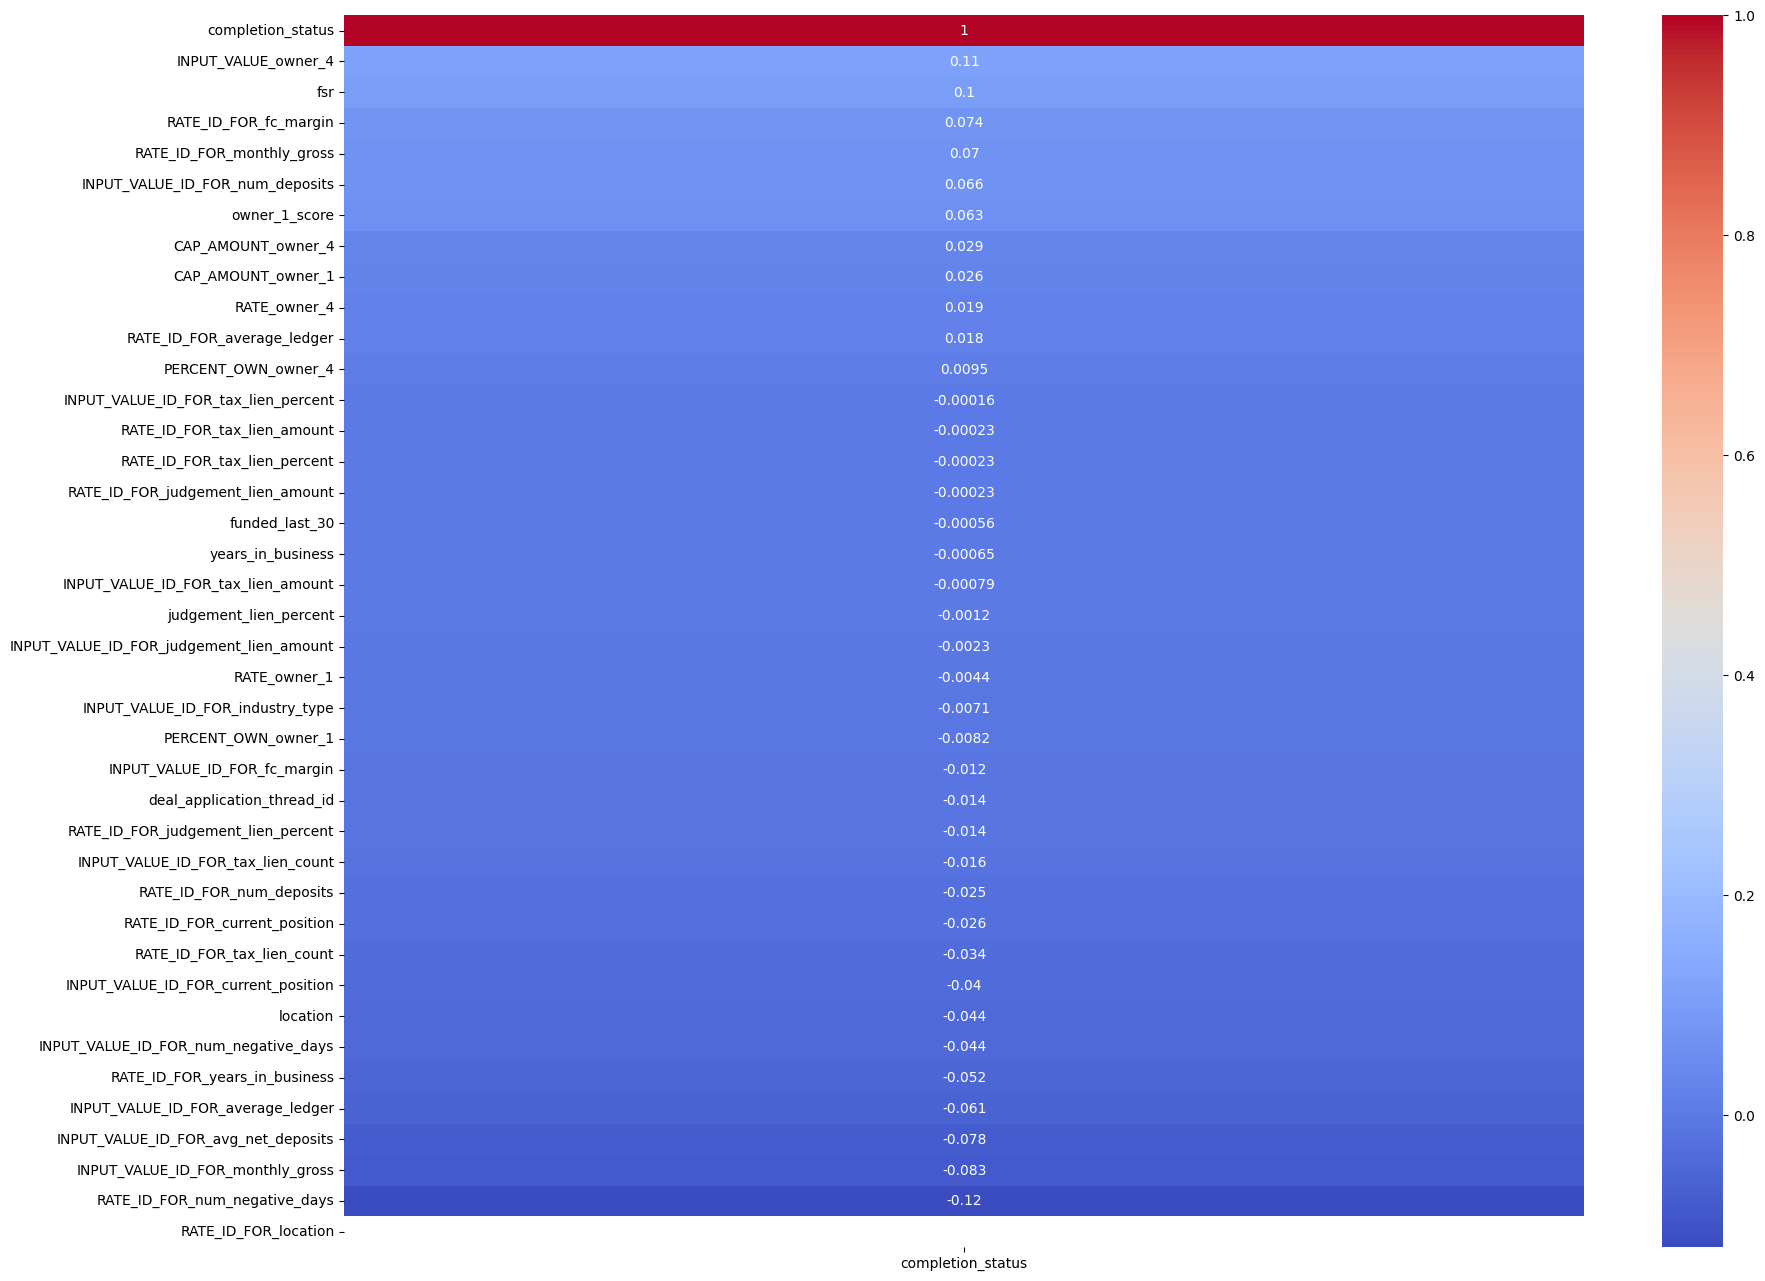

In [16]:
corr=df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr[['completion_status']].sort_values(by='completion_status', ascending=False), annot=True,cmap='coolwarm')
plt.show()

In [17]:
X=df.drop('completion_status',axis=1)
y=df['completion_status']

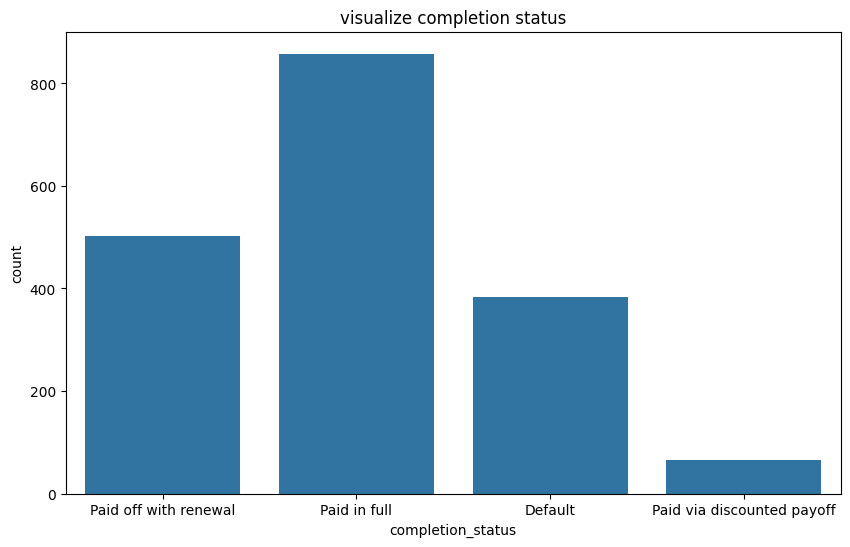

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title("visualize completion status")
plt.xticks([0,1,2,3], ["Paid off with renewal", "Paid in full","Default","Paid via discounted payoff"])
plt.show()

## After Balance The Data

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

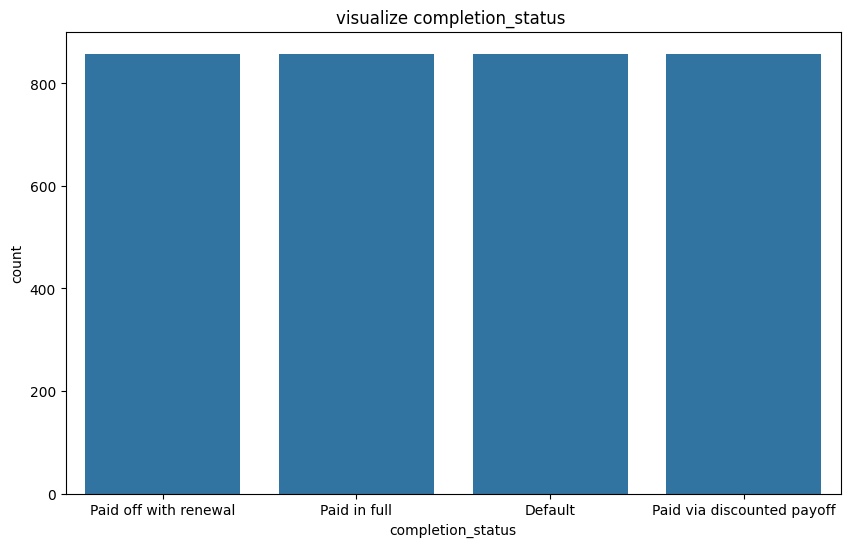

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=y_resampled)
plt.title("visualize completion_status ")
plt.xticks([0,1,2,3], ["Paid off with renewal", "Paid in full","Default","Paid via discounted payoff"])
plt.show()

In [21]:
X = X_resampled
y = y_resampled

### Grid Search To Find The Best Model And Paramater

In [22]:
models= {
    'SVM':{
        'model':SVC(probability=True, random_state=42),
        'parm':{
            'kernel':['rbf','poly','linear'],
            'C':[1,10,100]
        }
    },
    'Logstic Regression':{
        'model':LogisticRegression(random_state=42),
        'parm':{
            'max_iter':[100,300,500]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'parm':{
            'n_neighbors':range(1,12)
        }
    },
    'ID3':{
        'model':DecisionTreeClassifier(random_state=42),
        'parm':{
            'max_depth':[5,10,20]
        }
    },
    'Random_forest':{
        'model':RandomForestClassifier(random_state=42),
        'parm':{
            'n_estimators':[50,100,200]
        }
    }
}

In [23]:
# scores=[]
# for model_name, model_per in models.items():
#     clf = GridSearchCV(
#         estimator=model_per['model'],
#         param_grid=model_per['parm'],
#         cv=5,
#         scoring='accuracy',
#     )
#     clf.fit(X, y)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })

## Try Randomized SearchCV

In [24]:
# scores = []
# for model_name, model_per in models.items():
#     clf = RandomizedSearchCV(
#         estimator=model_per['model'],
#         param_distributions=model_per['parm'],
#         n_iter=3,
#         cv=5,
#         scoring='accuracy',
#         random_state=42
#     )
#     clf.fit(X, y)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })

In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=50),
    "SVM": SVC(probability=True, random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=3)
}

In [26]:
scores = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    scores.append({
        "model": name,
        "mean_score": cv_scores.mean(),
    })

results = pd.DataFrame(scores)
results

c:\Users\bisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bisho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

,model,mean_score
0,Logistic Regression,0.287013
1,Decision Tree,0.576930
2,Random Forest,0.961248
3,SVM,0.339159
4,KNN,0.883162


### Now We Get That Random Forest Model Is The Best

#### Split Data Into Train - Test & Scale It

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# scale = StandardScaler()
# x_train_scale=scale.fit_transform(X_train)
# x_test_scale=scale.transform(X_test)

## Train The Model & See Score In Train - Test

In [29]:
my_model = RandomForestClassifier(n_estimators=50 , random_state=42)
my_model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [30]:
y_pred = my_model.predict(X_test)

In [31]:
my_model.score(X_train,y_train)*100

100.0

In [32]:
my_model.score(X_test,y_test)*100

96.36098981077147

#### Calculate The Accuracy & Visualize It

In [33]:
accuracy_score(y_test,y_pred)*100

96.36098981077147

In [34]:
result = cross_val_score(my_model,X,y,cv=10)
result.mean()*100

np.float64(96.12482202183197)

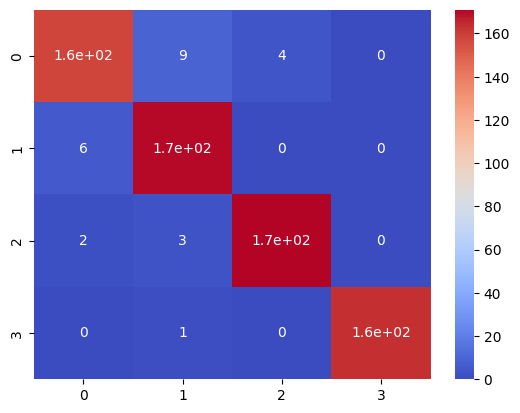

In [35]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.show()

In [36]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       171
           1       0.93      0.97      0.95       176
           2       0.98      0.97      0.97       176
           3       1.00      0.99      1.00       164

    accuracy                           0.96       687
   macro avg       0.96      0.96      0.96       687
weighted avg       0.96      0.96      0.96       687



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'deal_application_thread_id'),
  Text(1, 0, 'years_in_business'),
  Text(2, 0, 'INPUT_VALUE_owner_4'),
  Text(3, 0, 'owner_1_score'),
  Text(4, 0, 'fsr'),
  Text(5, 0, 'INPUT_VALUE_ID_FOR_avg_net_deposits'),
  Text(6, 0, 'INPUT_VALUE_ID_FOR_num_deposits'),
  Text(7, 0, 'INPUT_VALUE_ID_FOR_monthly_gross'),
  Text(8, 0, 'INPUT_VALUE_ID_FOR_average_ledger'),
  Text(9, 0, 'INPUT_VALUE_ID_FOR_fc_margin'),
  Text(10, 0, 'INPUT_VALUE_ID_FOR_num_negative_days'),
  Text(11, 0, 'PERCENT_OWN_owner_1'),
  Text(12, 0, 'RATE_owner_4'),
  Text(13, 0, 'RATE_ID_FOR_num_deposits'),
  Text(14, 0, 'INPUT_VALUE_ID_FOR_current_position'),
  Text(15, 0, 'CAP_AMOUNT_owner_1'),
  Text(16, 0, 'CAP_AMOUNT_owner_4'),
  Text(17, 0, 'location'),
  Text(18, 0, 'RATE_owner_1'),
  Tex

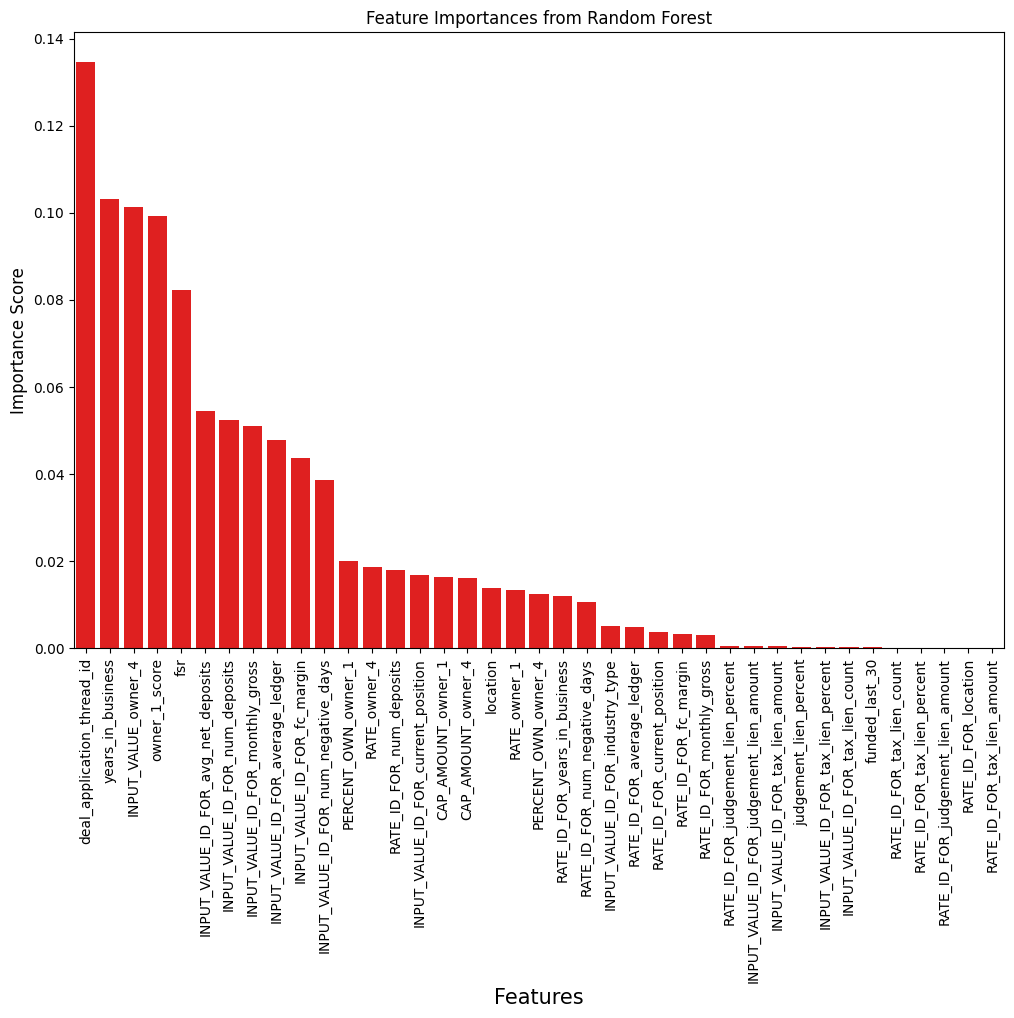

In [37]:
feature_importances = pd.Series(my_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(feature_importances , color = 'red')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features", fontsize=15)
plt.ylabel("Importance Score", fontsize=12)
plt.xticks(rotation=90)


In [39]:
import joblib
joblib.dump(my_model, "loan_model.pkl")
joblib.dump(X.columns.tolist(), "features.pkl")

['features.pkl']